<a href="https://colab.research.google.com/github/MateusPongo/Mateus-Pongo_ML_Breast_Cancer/blob/master/Image_Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install ipython-autotime
%load_ext autotime

time: 335 µs


In [36]:
# Data are in the form of images.
# 1. Download manually the images from Google
# 2. Download dataset from kaggle.com
# 3. Build an image web crawler
# 4. Use python libraries to scrape the images(using) 

time: 2.01 ms


In [5]:
!pip install bing-image-downloader

time: 2.83 s


In [2]:
!mkdir images 

In [8]:
from bing_image_downloader import downloader 
downloader.download("interior design",limit=30,output_dir="images",
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://residencestyle.com/wp-content/uploads/2019/02/Interior-Designer.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://freshome.com/wp-content/uploads/2014/10/interior-designer-4-1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://thearchitectsdiary.com/wp-content/uploads/2018/03/2-bhk-interior-design-14.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.decorilla.com/online-decorating/wp-content/uploads/2015/11/grey-winter-interior-design.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://freshome.com/wp-content/uploads/2014/10/interior-designer-11-1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.perfectinteriordesigns.com/blog/wp-content/uploads/2019/10/living-room.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.interiorsbysteveng.com/wp-content/uploads/2017/08/Hospitality_Interior_Design_Bus

In [11]:
import numpy as np 

a = np.array([[1,2,3,4,5],
              [4,5,6,7,8]])
a.ndim

2

time: 4.97 ms


In [12]:
# How to I convert Matrix to Vector? - Fltatten()
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 7.48 ms


In [13]:

# 1. Preprocessing 
# 2. Resize
# 3. Flatten

import os 
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['Sun flowers','interior design','iphone 11']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Labell Encoding the values
  path = os.path.join(DATADIR,category) # Create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array) # to get the matrix code.
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) # Normalized the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)



time: 1min 11s


In [14]:
flat_data[0]

array([0.25882353, 0.44313725, 0.78823529, ..., 0.24771242, 0.3248366 ,
       0.1       ])

time: 6.29 ms


In [15]:
len(flat_data[0])

67500

time: 2.69 ms


In [16]:
150*150*3

67500

time: 4.48 ms


In [17]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 2.83 ms


In [18]:
np.unique(target,return_counts=True)

(array([0, 1, 2]), array([30, 30, 30]))

time: 3.25 ms


<BarContainer object of 3 artists>

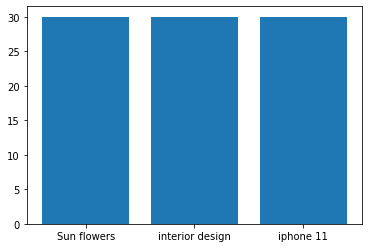

time: 149 ms


In [19]:
unique,counts = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,counts)

In [20]:
# Split data into Training and Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size = 0.3,random_state = 115)

time: 225 ms


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}, 
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 51s


In [22]:
y_pred =  clf.predict(x_test)
y_pred

array([1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 2])

time: 146 ms


In [23]:
y_test

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1,
       2, 1, 0, 1, 2])

time: 2.78 ms


In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 747 µs


In [25]:
accuracy_score(y_pred,y_test)

0.7777777777777778

time: 3.51 ms


In [26]:
confusion_matrix(y_pred,y_test)

array([[ 7,  0,  0],
       [ 0, 10,  5],
       [ 0,  1,  4]])

time: 5.81 ms


In [27]:
# Save the model using Pickle library

import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 35.2 ms


In [31]:
model = pickle.load(open('img_model.p','rb'))

time: 21.8 ms


Enter your URLhttps://th.bing.com/th/id/OIP.sLqX3Q0DInlEHd9lwswPvwHaE8?pid=Api&rs=1
(316, 474, 3)
PREDICTED OUTPUT: interior design


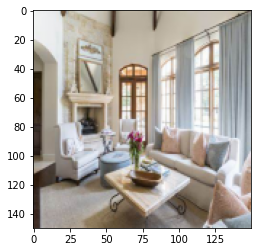

time: 8.2 s


In [35]:
# Testing a brand new image

flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [37]:
# Deployment

!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

  Created wheel for pyngrok: filename=pyngrok-4.2.2-cp36-none-any.whl size=18025 sha256=1b5e35cff2207658456ad6c011bf98203de96116224b4f9ffed4618e2f24821e
  Stored in directory: /root/.cache/pip/wheels/9c/d3/b5/502fbef4b2782a6142bc00c62ccde76ee04c9148fb43b1b2cd
Successfully built pyngrok
time: 6.22 s


In [38]:
# For deployment you can use:
# 1. WebPage: You will need, HTML/CSS/JS - Flask/Django
# 2. WebApp: You will need Streamlit/Dash
# 3. Mobile App: You will need, Kotlin/Java

time: 1.1 ms


In [69]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread 
from skimage.transform import resize
import pickle 
from PIL import Image
st.title('Image Classifier')
st.text('Upload an image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...", type='jpg')
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['Sun flowers','interior design','iphone 11']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')



Overwriting app.py
time: 9.36 ms


In [70]:
!nohup streamlit run app.py & 

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


t=2020-10-13T20:17:52+0000 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=88700f3f4b716384 err="Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\n[http://4a25566424bf.ngrok.io https://4a25566424bf.ngrok.io]\n\r\n\r\nERR_NGROK_324\r\n"


PyngrokNgrokHTTPError: ignored

time: 358 ms
